> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# VIII:  Neural Networks

### *Assignement Instructions:*
- **Due date**: 11 PM, Dec. 10, 2021
- **File name**: ID_Name_HW8.ipynb
- Write a program implementing a particular algorithm to solve a given problem.   
- **Analyze the algorithm, theoretically and empirically. Report and discuss your results.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by your so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework.
- Signiture: <span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span>

In [2]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-12-09 16:26:58.497372


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Problem statement

We will implement a simple neural network for classification. Let's first see how a simple logistic regression method works on the $\text{moon}$ dataset. This dataset has been widely used to evaluate performance of a nonlinear classifier or clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear\_model}$. See the example shown below. 

In [4]:
from project8 import *

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [6]:
# dataset
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

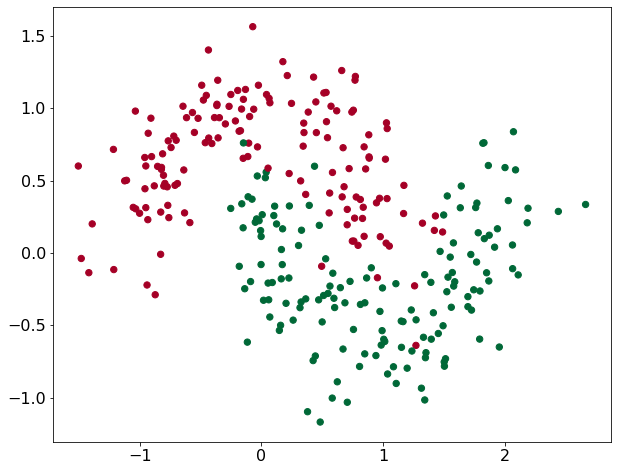

In [7]:
plt.scatter(X_train[:,0], X_train[:,1], s = 40, c=y_train, cmap=plt.cm.RdYlGn)

It seems hard to classify samples in the dataset using linear classifiers such as a logistic regression method. That is, drawing a straight line (i.e., decision boundaries) to divide training samples into two different regions is not feasible. The $\texttt{sklearn.linear\_model}$ provides a set of linear models. See the following webpage: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [8]:
import sklearn.linear_model

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use the help function ($\texttt{plot\_decision\_boundary}$) that takes three values (or functions) as inputs. $\texttt{pred\_func}$ is an output of the classifiers, e.g., the output value of the sigmoid function in case of logistic regression. Other two arguments, $\texttt{train\_data}$ and $\texttt{color}$, are the training dataset and color for each label in the dataset, respectively. See the example below.

In [9]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X_train, y_train)

LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

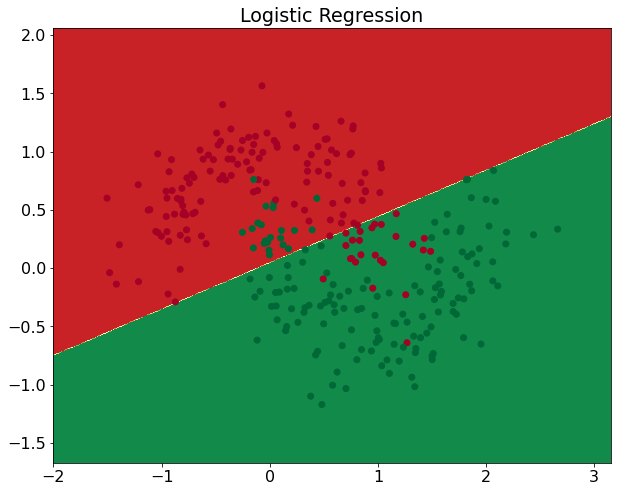

In [10]:
# plot boundary
plot_decision_boundary(pred_func=clf.predict, train_data = X_train, color = y_train)
plt.title("Logistic Regression")

In [11]:
X_train.shape

(300, 2)

As you can see, we need nonlinear classifiers to classify such datasets. Let's implement a nonlinear classifier with a simple neural network, and apply it to classify samples in the $\texttt{moon}$ dataset. The neural network we will implement consists of series of fully connected layers followed by nonlinear activation functions. 

### P1. Implement Neural networks using gradiend descent.
P1.1 Implement a multilayer perceptron method (```class NeuralNetwork```) using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset. Plot training losses and training accuracy over the number of epochs. (*50 points*)

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = \sigma(H_1)$ where $\sigma$ is a sigmoid function unit and $z_1$ is an output of the first hidden layer.  
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = tanh(H_2)$ where $\tanh$ is a tanh function and $z_2$ is an output of the second hidden layer.    
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $\hat y = softmax(H_3)$ where $softmax$ is a softmax function and $\hat y$ is an output of the network.
 > The $j$th element of the softmax function is defined as follows.
 >
 > $softmax(h)_j= \frac{\exp^{h_j}}{\sum_{k=1}^{K} \exp^{h_k}}$ for $j=1,\dots,K$,
 >
 > where $h_j$ is the $j$th element of the input vector $h\in \mathcal{R}^K$ and $K$ is the number of class.
 
Note that $softmax$ can be can be seen as a general version of the sigmoid function, and it is typically used for multiclass classification. 
 
 > **$W$** and **$b$** are weights and bias, respectively.    
 > **Initialization for weight**: Standard normal (use $\texttt{np.random.randn}$.)  
 > **Initialization for bias (intercept)**: 0     
 > **Input size**: 2  
 > **The first hidden layer size**: 10  
 > **The second hidden layer size**: 10  
 > **Output size**: 2   
 > **Regularization coefficient $\lambda$**: 0.001  
 > **Loss function**: Cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -\sum_{k=1}^K I_k \log(softmax(H_3)_k)$
 >
 > where $I_k$ is an indicator function that has the value of 1 if the training sample belongs to the class $k$ and 0 otherwise.   
 > **Total loss** : summation of above for all training samples and L2 normalization loss   
 >
 > $L_{total} = -\sum_{i=1}^N{\sum_{k=1}^K I^{(i)}_k \log(softmax(H_3^{(i)})_k)} +  \lambda \|W\|^2 $
 >
 > where $I^{(i)}$ and $H_3^{(i)}$ are the indicator and the output of the last hidden layer of i-th sample respectively.  
 > **Optimization**: Gradient descent  
 > **Learning rate** = 0.001  
 > **Number of epochs** = 50000

### P2. A modular approach to implementing Neural networks

P2.1 Implement ```class Linear```, ```class ReLU```, ```class Tanh```, ```class Sigmoid``` and ```class NeuralNetwork_module``` (*30 points*).

We will implement a multilayer perceptron method with modular functions, similar to the generic deep learning libraries such as `PyTorch` and `TensorFlow`.  To perform classification using ```class NeuralNetwork_module```, we define `forward` and `backward` operations for each layer (e.g., ReLu layer, linear layer (y=Wx), Tanh layer, or sigmoid layer), whose inputs and ouputs are matrices. Note that a linear layer (```Linear``` class) also inputs an additinal weight matrix. Note also that we should chche data needed for a backward pass in `forward` operations.


Please see the description for `forward` and `backward` operations in the linear layer (```class Linear```) below.

```python
class Layer(Object):
    @staticmethod
    def forward(x):
      """ Receive inputs x and weights w """
      # Do some computations ...
      z = # ... some intermediate value
      # Do some more computations ...
      out = # the output

      cache = (x, out) # Values we need to compute gradients

      return out, cache

    @staticmethod
    def backward(dout, cache):
      """
      Receive dout (derivative of loss with respect to outputs) and cache,
      and compute derivative with respect to inputs.
      """
      # Unpack cache values
      x, out = cache
    
      # Use values in cache to compute derivatives
      dx = # Derivative of loss with respect to x
     
      return dx
```




### P1.1

In [12]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 37.286995984271215
Loss (epoch 2000): 33.980979425864476
Loss (epoch 3000): 32.49275282938092
Loss (epoch 4000): 31.323004533019507
Loss (epoch 5000): 30.281969278905834
Loss (epoch 6000): 29.404040363310536
Loss (epoch 7000): 28.70075800112715
Loss (epoch 8000): 28.130477119708985
Loss (epoch 9000): 27.64743002745585
Loss (epoch 10000): 27.216283718351587
Loss (epoch 11000): 26.820299652413112
Loss (epoch 12000): 26.45319599998637
Loss (epoch 13000): 26.111117395422184
Loss (epoch 14000): 25.788763458455136
Loss (epoch 15000): 25.478710823155886
Loss (epoch 16000): 25.17305682787495
Loss (epoch 17000): 24.86613369303283
Loss (epoch 18000): 24.555369271931838
Loss (epoch 19000): 24.234229098329063
Loss (epoch 20000): 23.889684350209464
Loss (epoch 21000): 23.51836189605395
Loss (epoch 22000): 23.1206267689101
Loss (epoch 23000): 22.692024889667085
Loss (epoch 24000): 22.22791970551523
Loss (epoch 25000): 21.722295040497674
Loss (epoch 26000): 21.16954970462442
Loss (

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

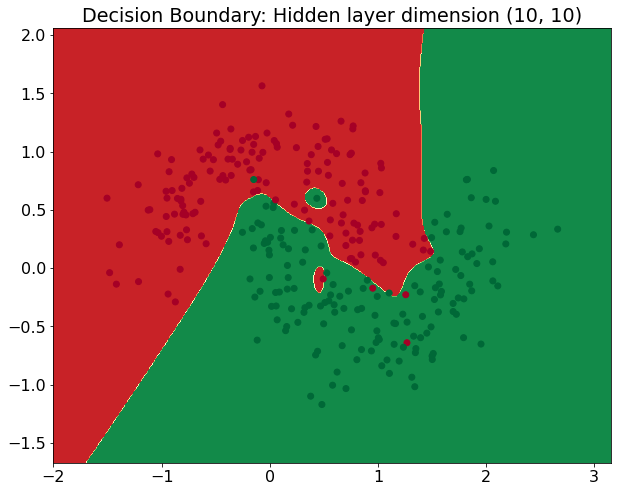

In [13]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

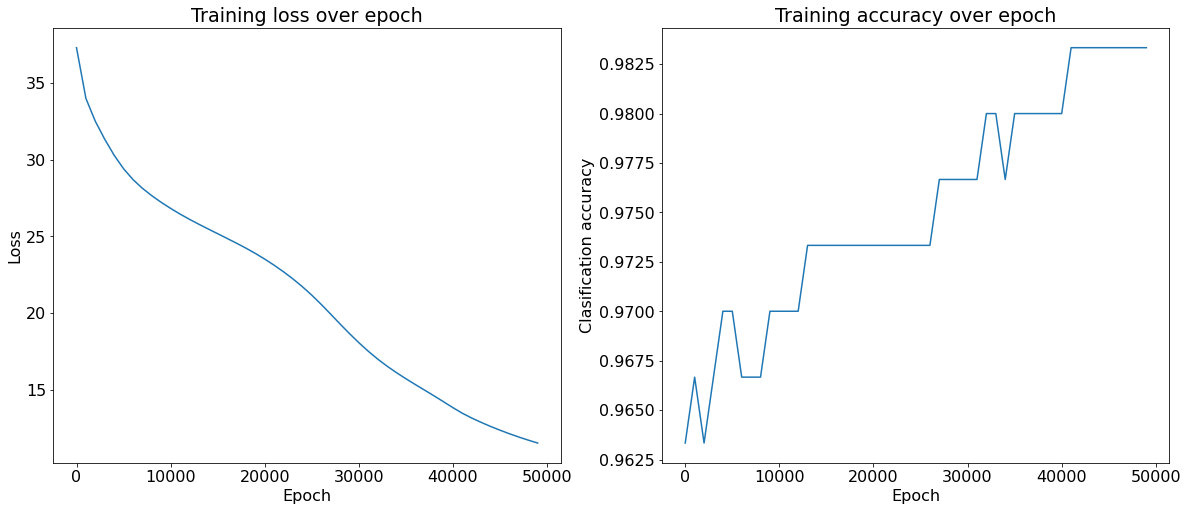

In [14]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

### P2.1

In [15]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 37.28699589756993
Loss (epoch 2000): 33.980979365416786
Loss (epoch 3000): 32.49275281340908
Loss (epoch 4000): 31.323004551348227
Loss (epoch 5000): 30.281969305695966
Loss (epoch 6000): 29.404040383273323
Loss (epoch 7000): 28.700758016122414
Loss (epoch 8000): 28.13047713329305
Loss (epoch 9000): 27.647430041164856
Loss (epoch 10000): 27.21628373243705
Loss (epoch 11000): 26.820299666668856
Loss (epoch 12000): 26.453196013741394
Loss (epoch 13000): 26.11111740751614
Loss (epoch 14000): 25.788763467443182
Loss (epoch 15000): 25.478710827506355
Loss (epoch 16000): 25.17305682636929
Loss (epoch 17000): 24.866133685213324
Loss (epoch 18000): 24.555369256032872
Loss (epoch 19000): 24.23422906586345
Loss (epoch 20000): 23.889684291492802
Loss (epoch 21000): 23.518361809268708
Loss (epoch 22000): 23.1206266530172
Loss (epoch 23000): 22.69202474358882
Loss (epoch 24000): 22.227919528931196
Loss (epoch 25000): 21.722294831846952
Loss (epoch 26000): 21.169549461069604
Loss 

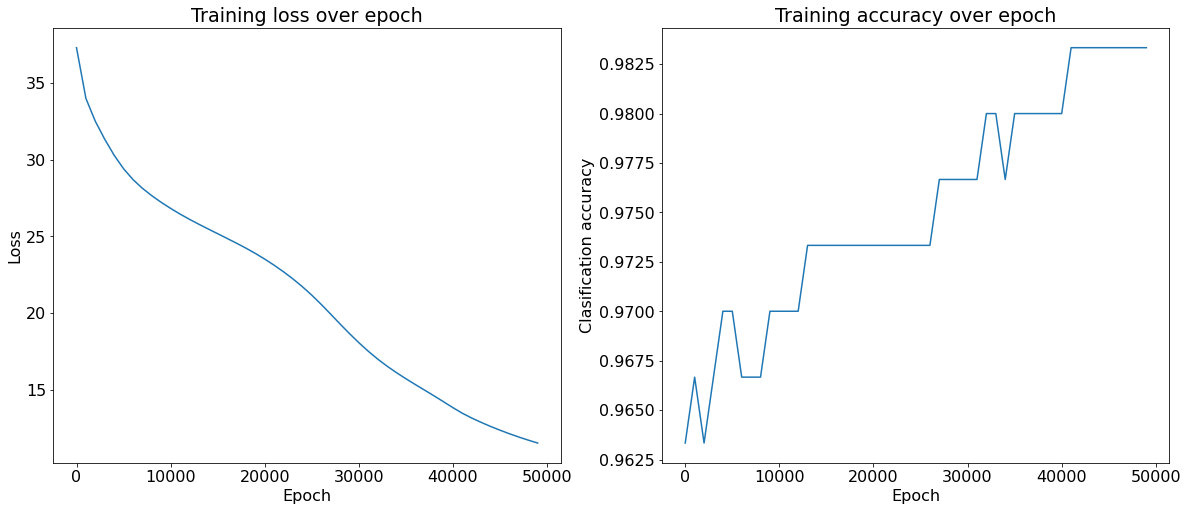

In [16]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

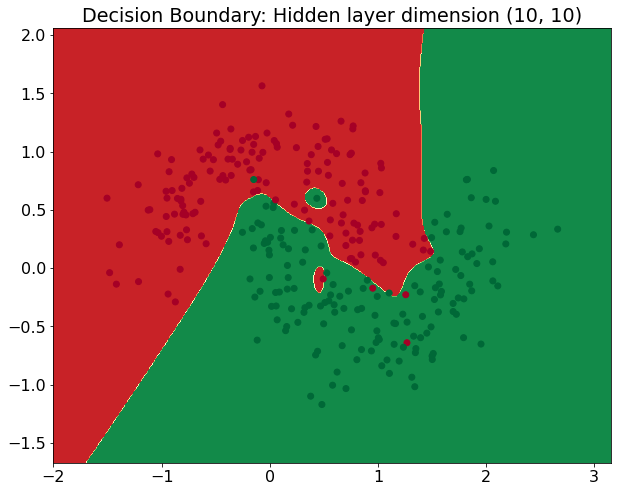

In [17]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

### Play with your networks
#### Capacity
Change the numbers of nodes in hidden layers as follows, and plot decision boundaries: (1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are the numbers of nodes in the first and second hidden layers, respectively.

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


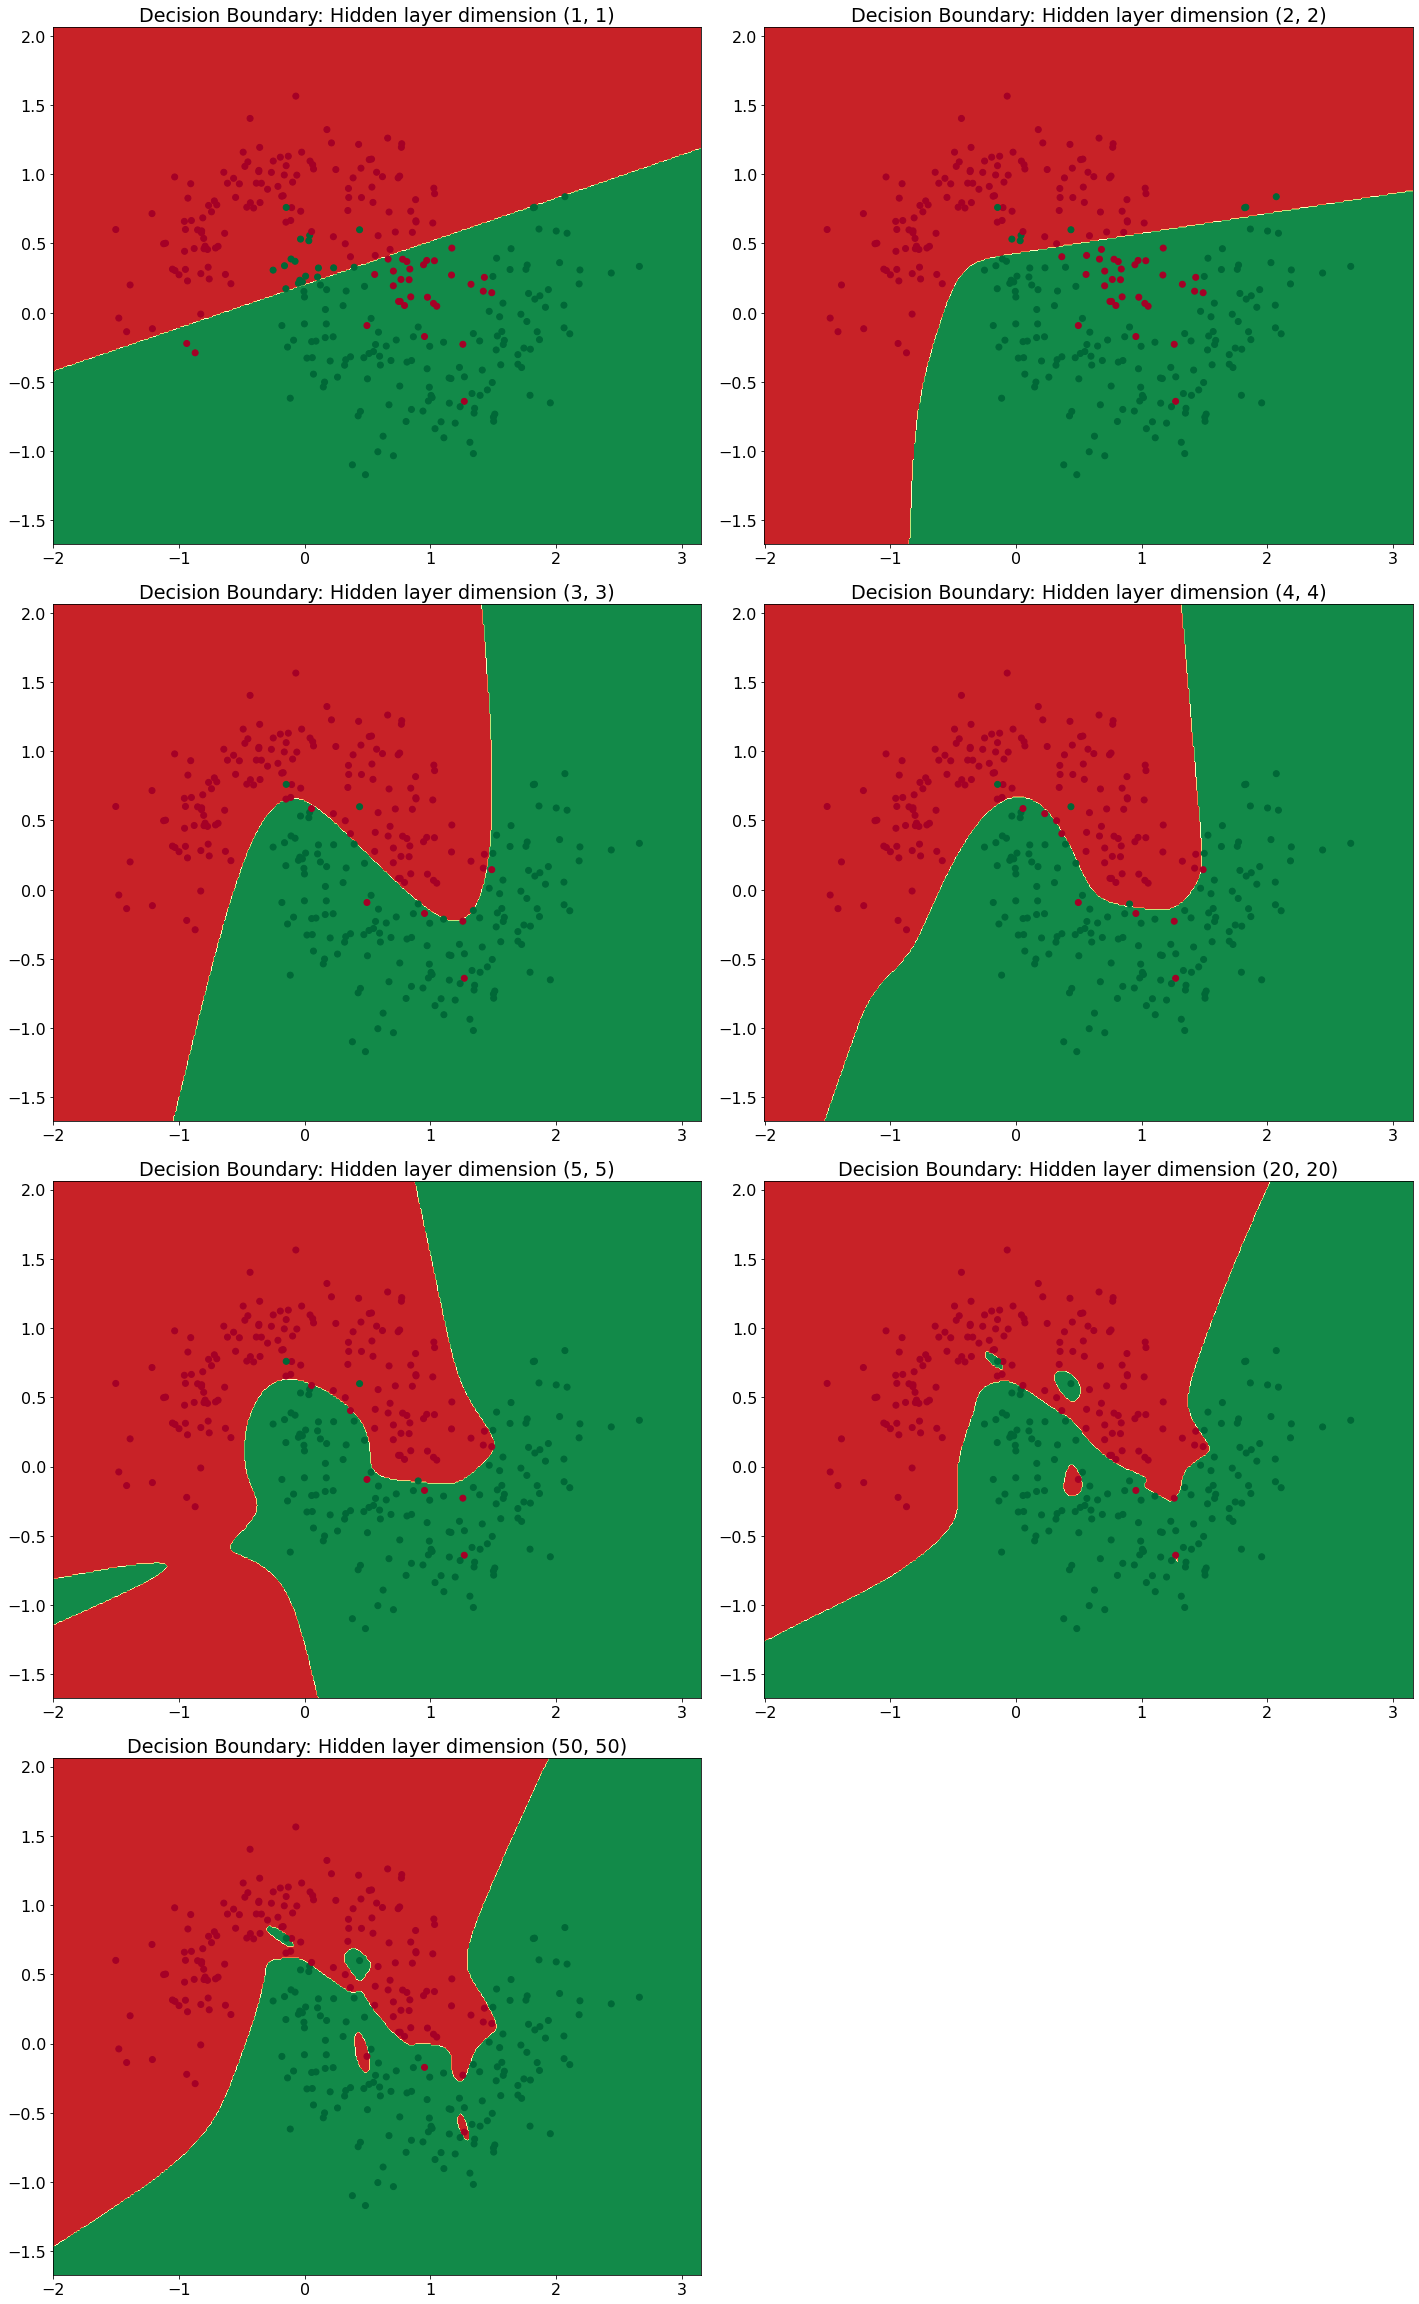

In [18]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
lr = 0.001 
epoch = 50000

hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim, nn_hdim}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, epoch=epoch,  L2_norm=0.0, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Hidden layer dimension {nn_hdim, nn_hdim} ... done")

plt.gcf().set_size_inches(20, 40)
plt.tight_layout()
plt.show()

#### Regularization
Adjust the regularization coefficient as follows, and plot decision boundaries: \[0, 1e-5, 1e-3, 1e-1\].

Learning NN: Regularization 0 ... done
Learning NN: Regularization 1e-05 ... done
Learning NN: Regularization 0.001 ... done
Learning NN: Regularization 0.1 ... done


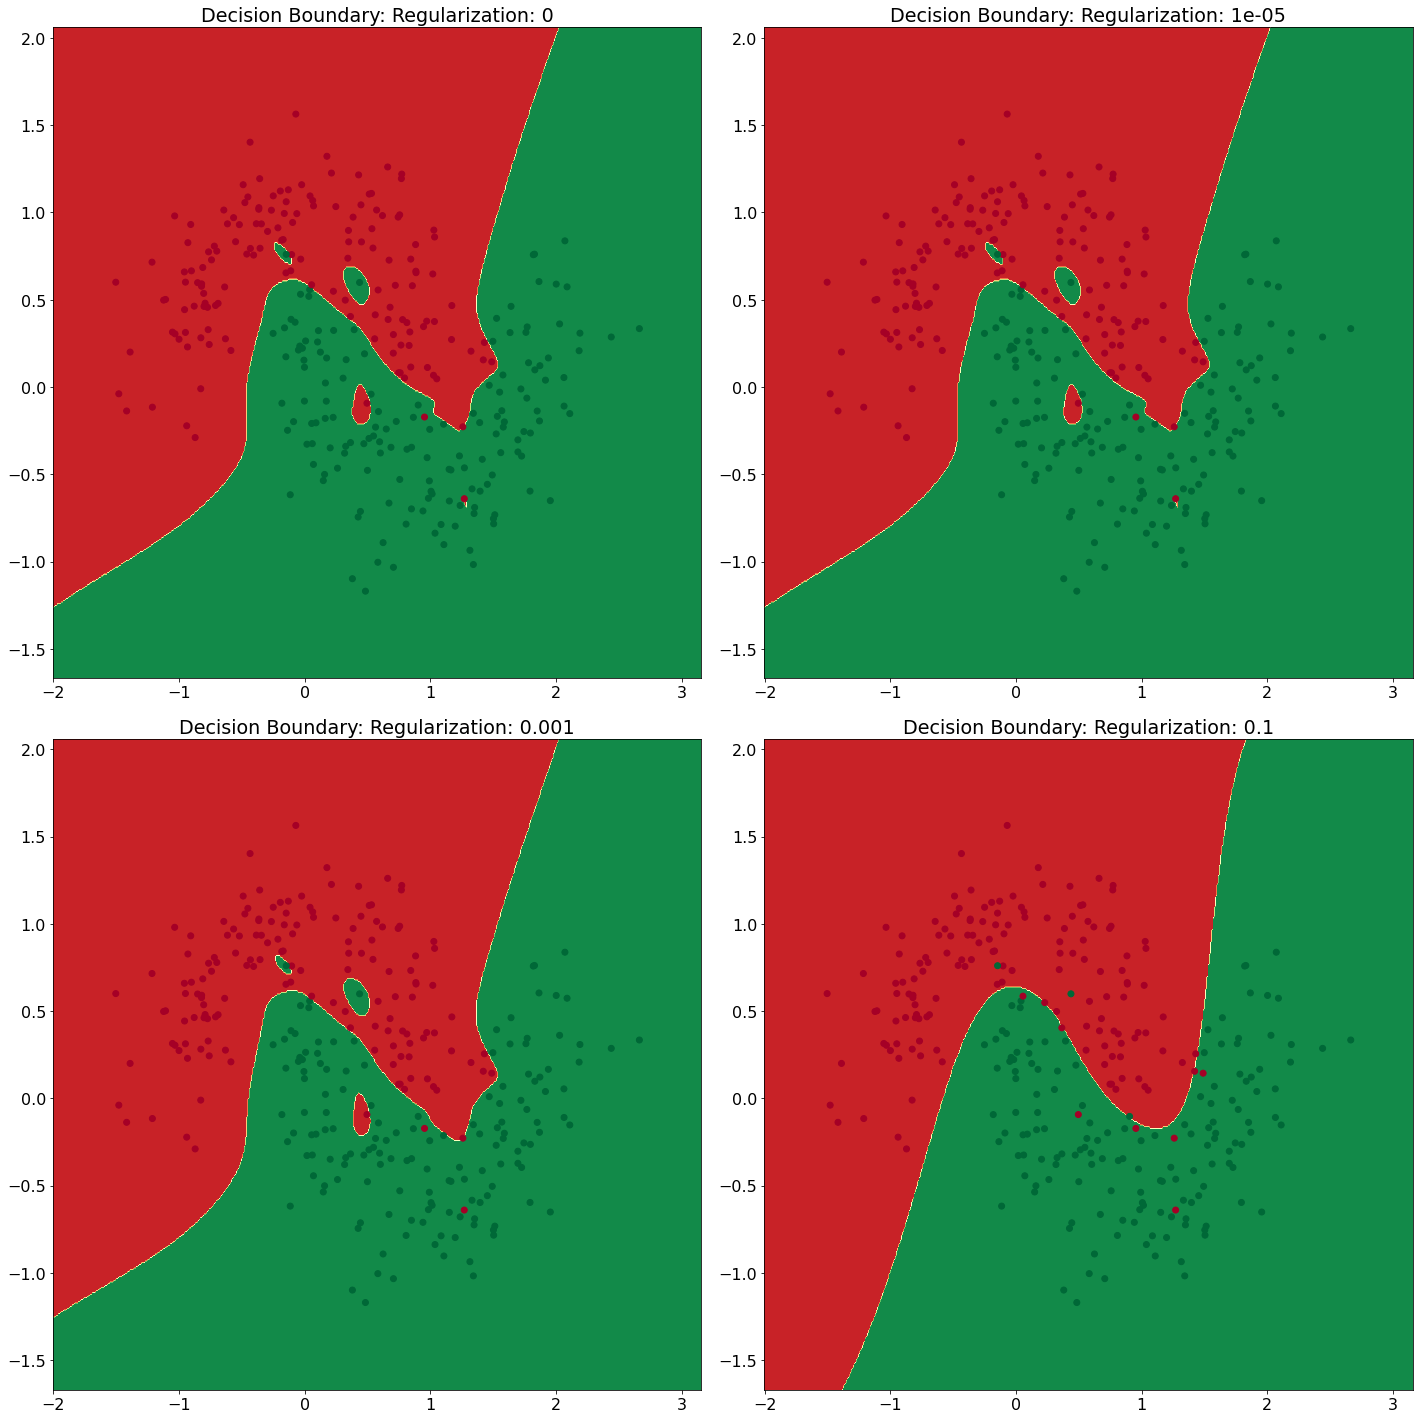

In [19]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 20
nn_output_dim = 2
lr = 0.001 
epoch = 50000


L2_norm_list = [0, 1e-5, 1e-3, 1e-1]
for i, L2_norm in enumerate(L2_norm_list):
    plt.subplot(2, 2, i+1)
    plt.title(f"Decision Boundary: Regularization: {L2_norm}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Regularization {L2_norm} ... done")
    
plt.gcf().set_size_inches(20, 20)
plt.tight_layout()
plt.show()

#### Testing our NN on a complex synthetic dataset.

In [36]:
X, y = make_spiral(n_samples_per_class=300, n_classes=4,
                    n_rotations=1.5, gap_between_spiral=0.7, noise=1.2,
                    gap_between_start_point=0.1, equal_interval=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

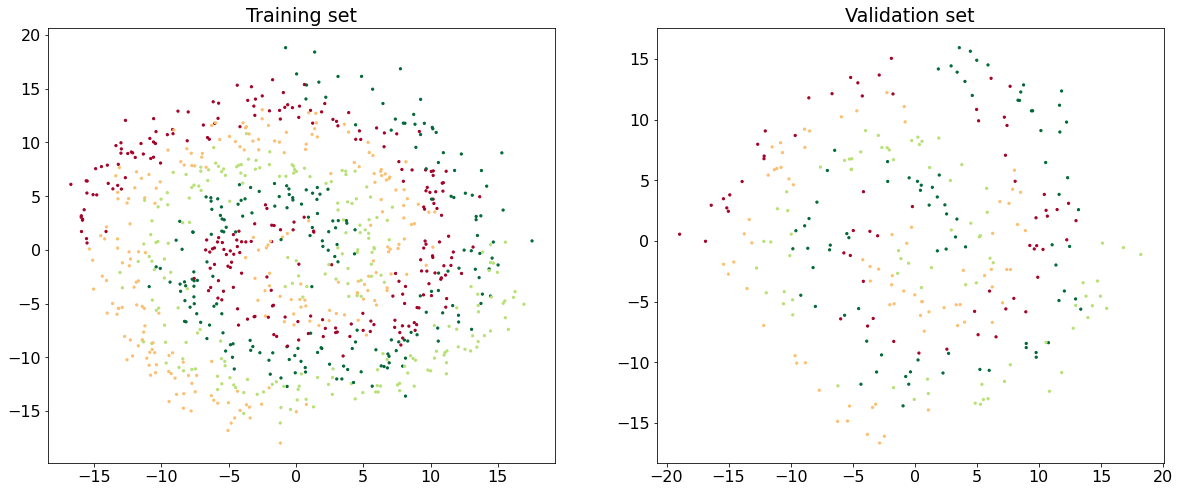

In [21]:
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], s = 5, c=y_train, cmap=plt.cm.RdYlGn)
plt.title('Training set')
plt.subplot(1, 2, 2)
plt.scatter(X_val[:,0], X_val[:,1], s = 5, c=y_val, cmap=plt.cm.RdYlGn)
plt.title('Validation set')
plt.gcf().set_size_inches(20, 8)

In [32]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 4
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.0001 
L2_norm = 0.1
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, X_val=X_val, y_val=y_val, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

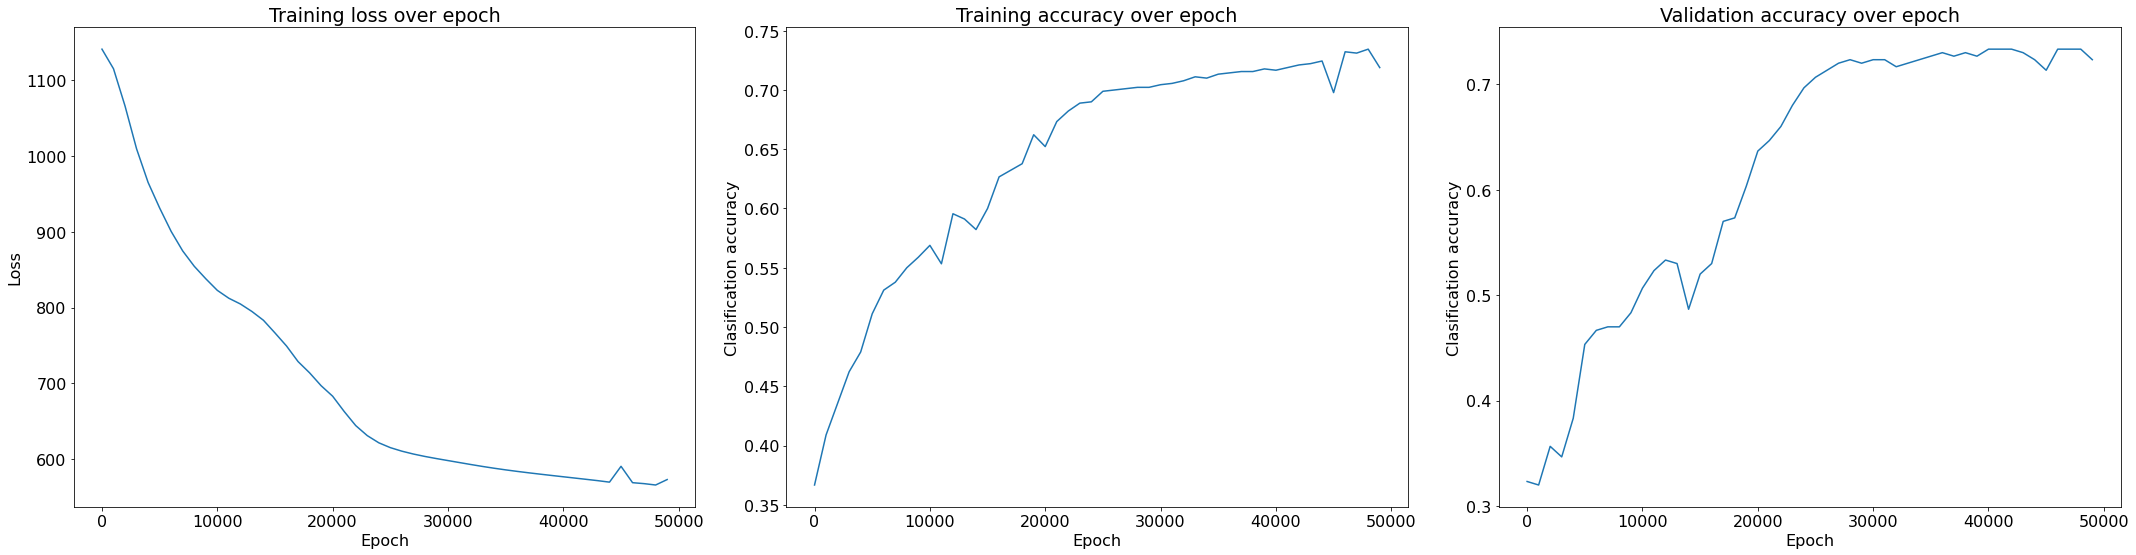

In [23]:
plt.gcf().set_size_inches(30, 8)
plt.subplot(1, 3, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 3, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.subplot(1, 3, 3)
plt.plot(np.arange(len(stats['val_acc_history'])) * 1000, stats['val_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Validation accuracy over epoch')
plt.tight_layout()

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

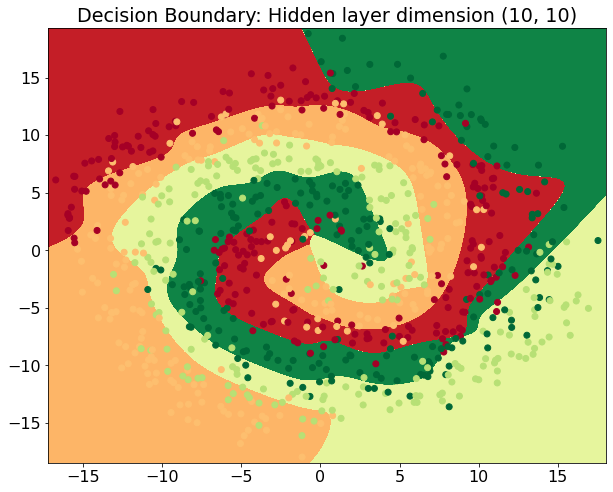

In [24]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

## Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation for a multilayer perceptron in both approaches (flat and modular codes)
- Random initialization vs Constant initialization
- Relationship between the number of hidden layers and decision boundary.
- The effect of regularization with respect to the performance.
- The effect of learning rate with respect to the performance.
- Analysis of the above results 

For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

---

### Implementation of a multilayer perceptron

- Modular code  
Layer와 activation function을 하나의 클래스로 생성, class는 forward와 backprop 함수를 포함
numpy 기능을 최대한 이용해서 computing time을 줄임  
y_train의 label에 해당하는 y_hat 값을 이용해서 loss 계산  
sigmoid, relu, tanh, softmax의 경우 forward prop.의 결과를 이용해 backprop 진행  



- Flat code  
Modular code를 base로 해서 모듈로 싸여진 코드를 풀어서 작성  
! compute_loss 함수에서 (N, class_num) shape를 가진 softmax의 결과값 y_hat을 인자로 받아 이를 이용해서 loss를 계산  




---
### Random initialization vs Constant initialization

Learning NN: Initialization: random ... done
first layer weight: [[ 0.75100978  0.53907425  0.5306466   2.68472275  0.7843893  -0.78295592
  -0.2924983   0.97721402 -0.48180992  0.21625303]
 [-0.66838168  0.96496741  0.60636504  0.15016499  0.38540697  0.6621786
   0.65100763 -0.4127977  -1.07040957 -0.92979729]]
Learning NN: Initialization: constant ... done
first layer weight: [[1.30798621 1.30798621 1.30798621 1.30798621 1.30798621 1.30798621
  1.30798621 1.30798621 1.30798621 1.30798621]
 [0.12180249 0.12180249 0.12180249 0.12180249 0.12180249 0.12180249
  0.12180249 0.12180249 0.12180249 0.12180249]]


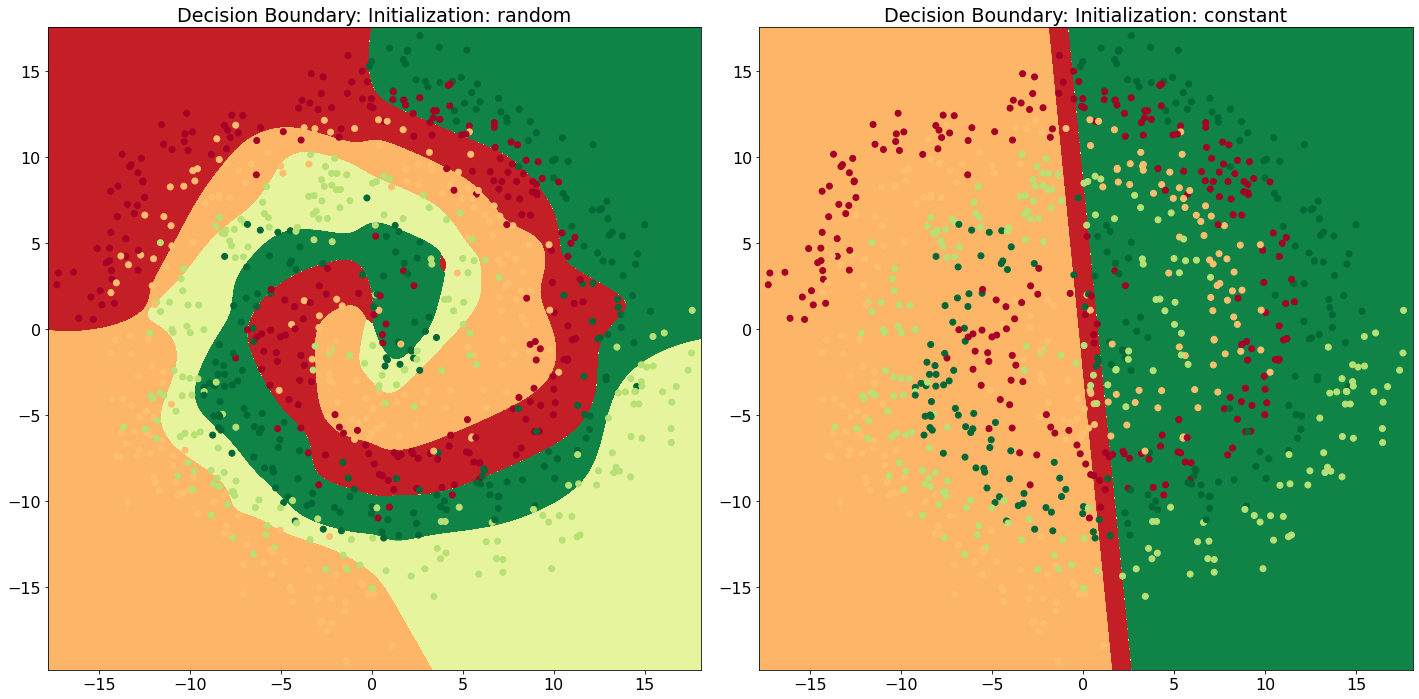

In [69]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 10
nn_output_dim = 4
lr = 0.0001
epoch = 50000


init_list = ['random', 'constant']
for i, init in enumerate(init_list):
    plt.subplot(1, 2, i+1)
    plt.title(f"Decision Boundary: Initialization: {init}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init=init)      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=0.1, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Initialization: {init} ... done")
    print("first layer weight: ", end='')
    print(model.model['W1'])
    
plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show()

- random initialization을 이용했을 때에는 non-linearity를 제대로 반영한 결과를 얻어냄.   
- constant initialization의 경우에는 모든 weight이 1로 초기화 되는데, 이로 인해 layer의 모든 weight이 같은 값으로 설정되고 non-linearity가 상쇄되면서 학습이 제대로 되지 않음을 확인할 수 있음.

---
### Performance with increasing learning rate 

Learning NN: Learning rate: 1e-05 ... done
Learning NN: Learning rate: 0.0001 ... done
Learning NN: Learning rate: 0.0003 ... done


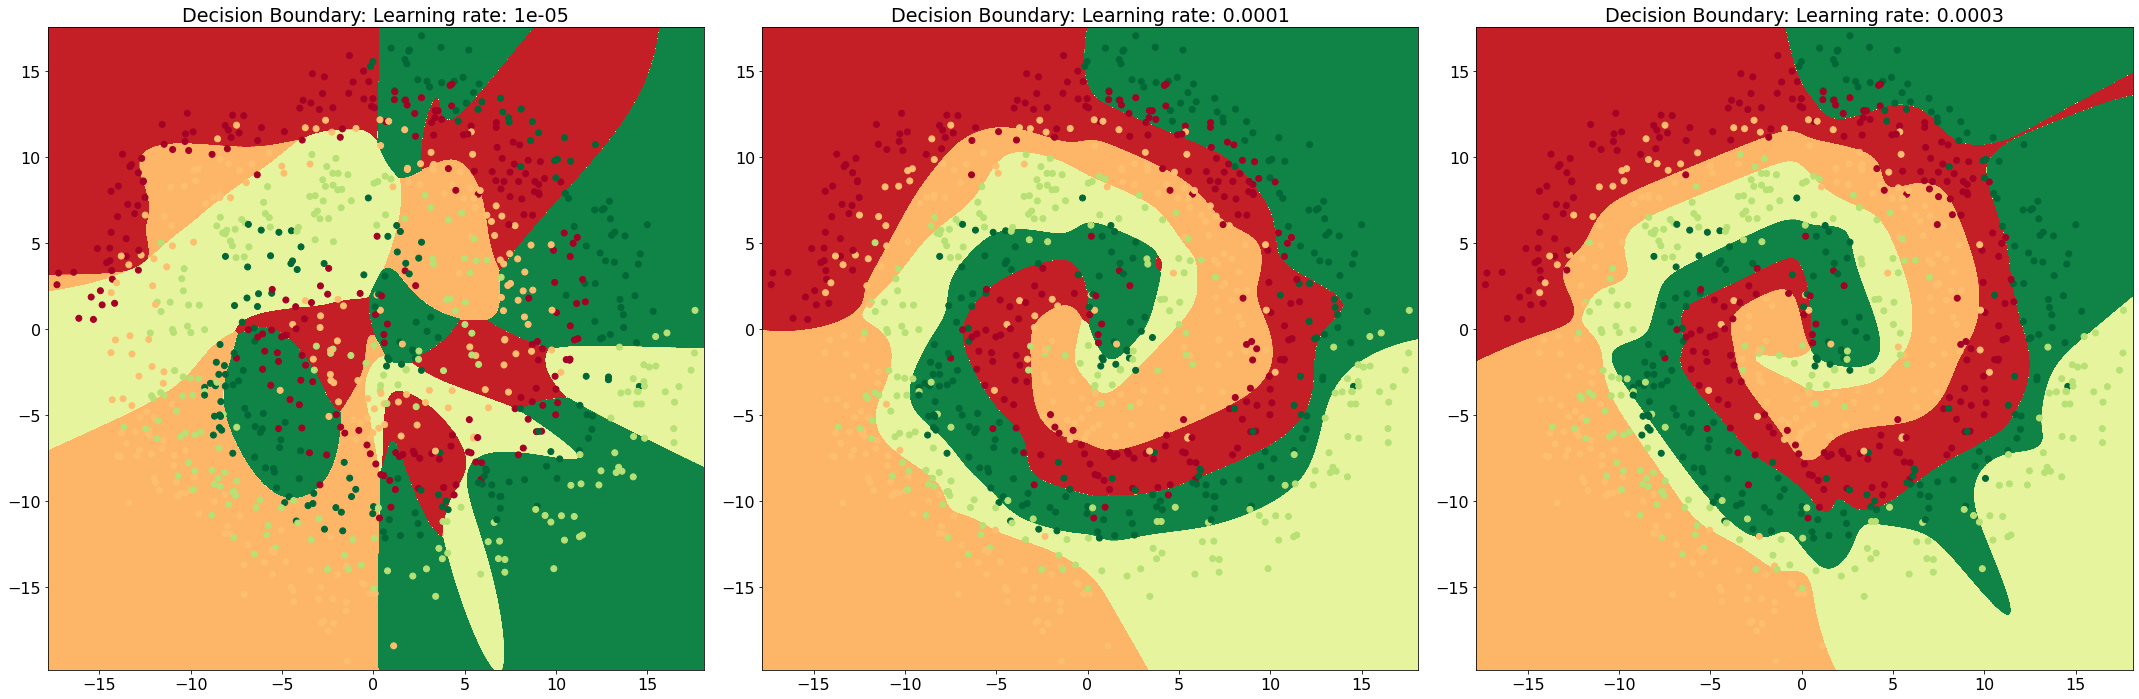

In [56]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 10
nn_output_dim = 4
epoch = 50000


lr_list = [1e-5, 1e-4, 3e-4]
for i, lr in enumerate(lr_list):
    plt.subplot(1, 3, i+1)
    plt.title(f"Decision Boundary: Learning rate: {lr}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init='random')      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=0.1, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Learning rate: {lr} ... done")
    
plt.gcf().set_size_inches(30, 10)
plt.tight_layout()
plt.show()

learning rate가 줄어들면 minimum 값을 찾기 위해선 step을 더 많이 가져가야 하는데, epoch 수가 이를 따라가지 못하면서 학습이 제대로 되지 않는 모습을 확인할 수 있다. learning rate가 커지면 minimum 값을 지나쳐 결과의 quality가 나빠질 수 있는데, 이러한 현상을 위에서도 확인할 수 있다.

Learning NN: Learning rate: 1e-05 ... done
Learning NN: Learning rate: 0.0001 ... done
Learning NN: Learning rate: 0.0003 ... done


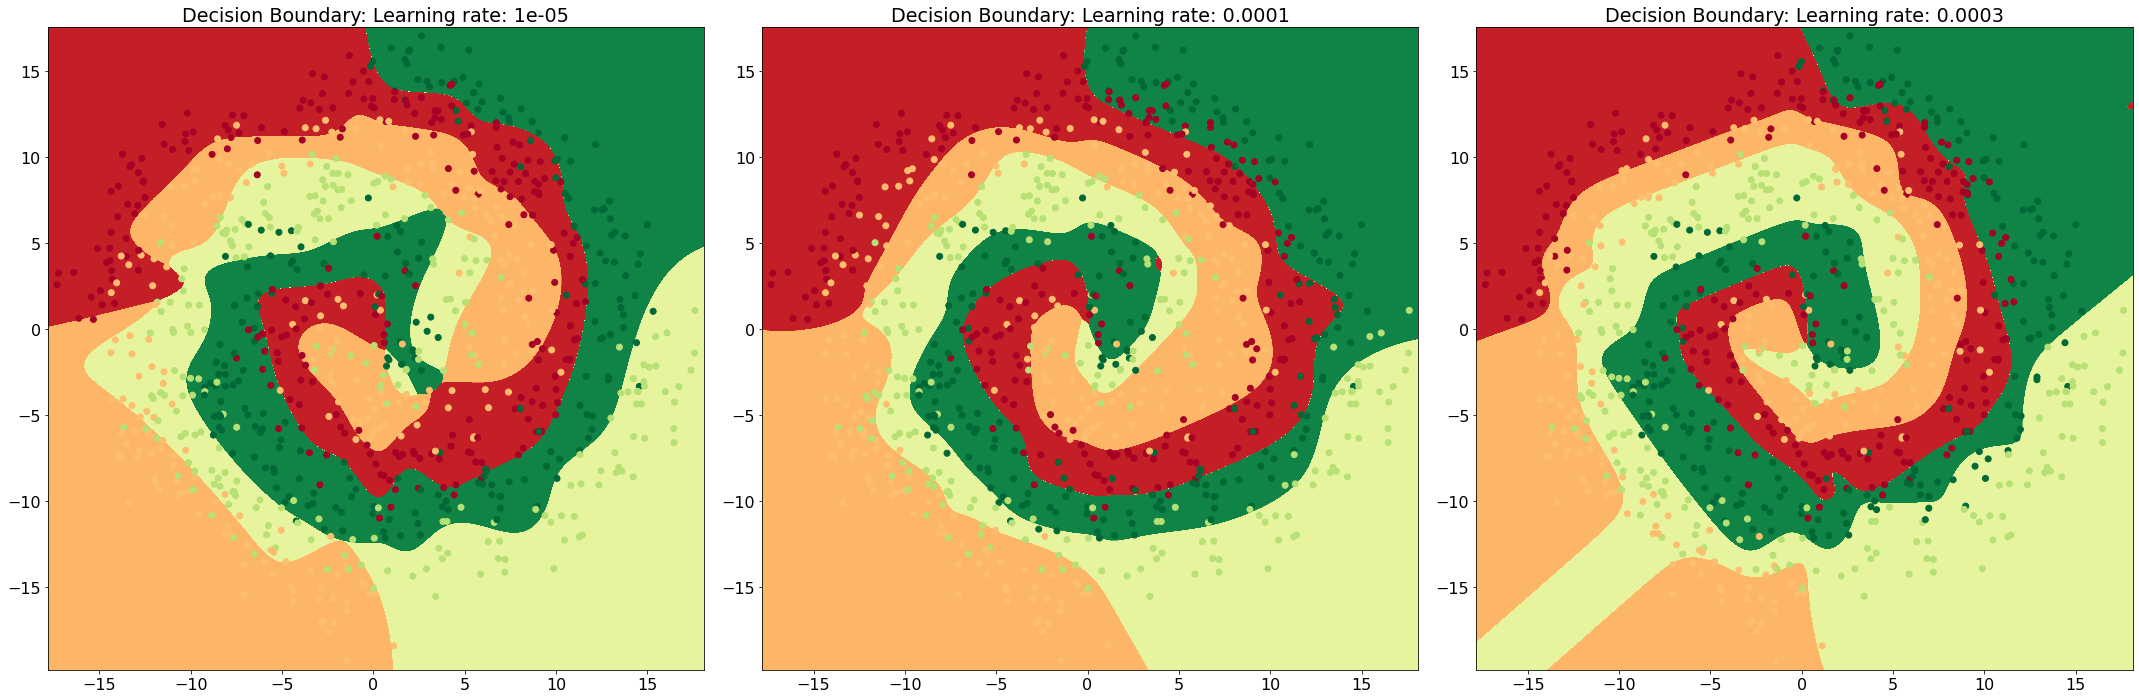

In [62]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 10
nn_output_dim = 4


tup = [(1e-5, 200000), (1e-4, 50000), (3e-4, 40000)]
for i, j in enumerate(tup):
    lr, epoch = j
    plt.subplot(1, 3, i+1)
    plt.title(f"Decision Boundary: Learning rate: {lr}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init='random')      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=0.1, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Learning rate: {lr} ... done")
    
plt.gcf().set_size_inches(30, 10)
plt.tight_layout()
plt.show()

위 그림은 learning rate의 값에 따라 epoch 수를 다르게(반비례한 경향) 설정하고 코드를 실행한 결과이다. lr이 작은 경우에 epoch 수를 더 많이 가져갈 수록 error가 더 적은 것을 확인할 수 있다. 또한, learning rate가 클 때는 epoch 수를 적게 설정해도 기존의 setting을 이용한 결과(가운데 결과)와 비슷한 결과를 내는 것을 볼 수 있다.

---
### The effect of regularization with respect to the performance.

Learning NN: Regularization 0 ... done
Learning NN: Regularization 0.001 ... done
Learning NN: Regularization 0.1 ... done
Learning NN: Regularization 0.5 ... done


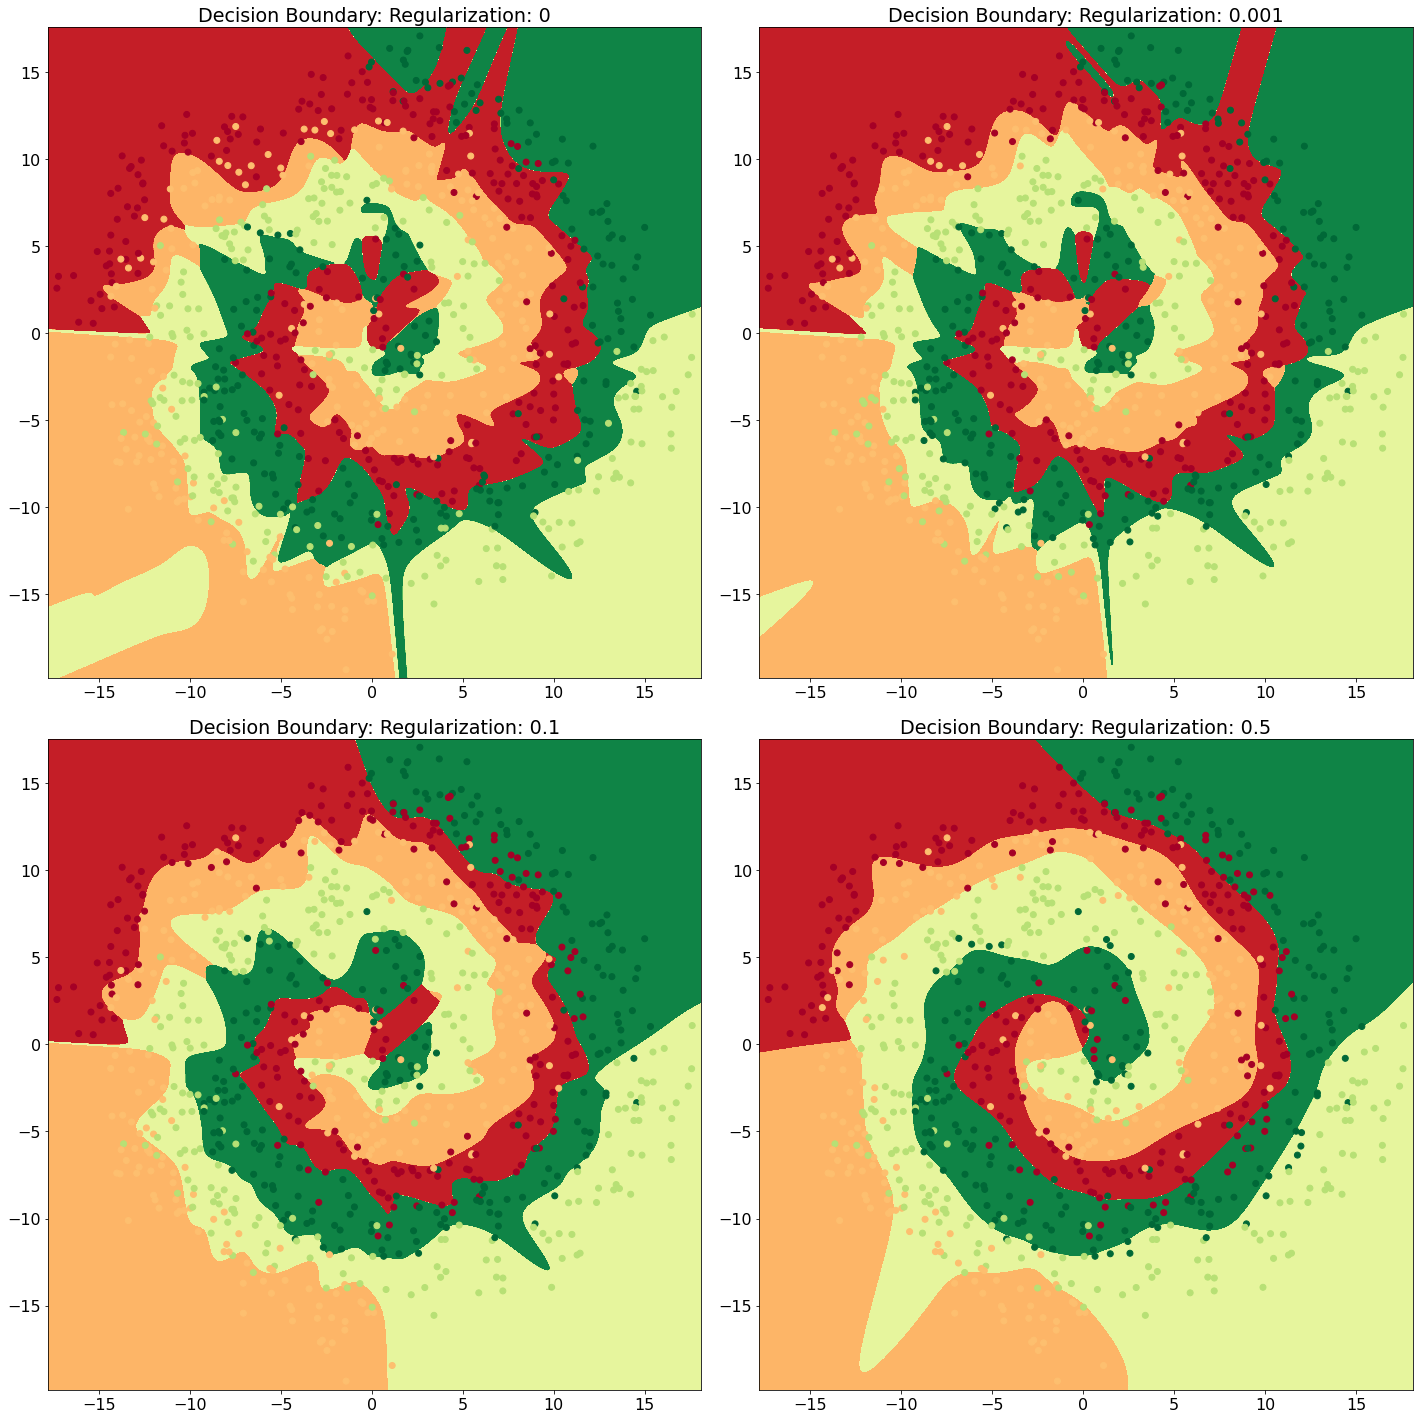

In [67]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 20
nn_output_dim = 4
lr = 3e-4
epoch = 40000


L2_norm_list = [0, 1e-3, 1e-1, 5e-1]
for i, L2_norm in enumerate(L2_norm_list):
    plt.subplot(2, 2, i+1)
    plt.title(f"Decision Boundary: Regularization: {L2_norm}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Regularization {L2_norm} ... done")
    
plt.gcf().set_size_inches(20, 20)
plt.tight_layout()
plt.show()

Regularization 값이 클수록 overfitting을 막아주면서 더 부드러운 경계선을 보여준다.

----

### Relationship between the number of hidden layers and decision boundary.

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10, 10, 10)')

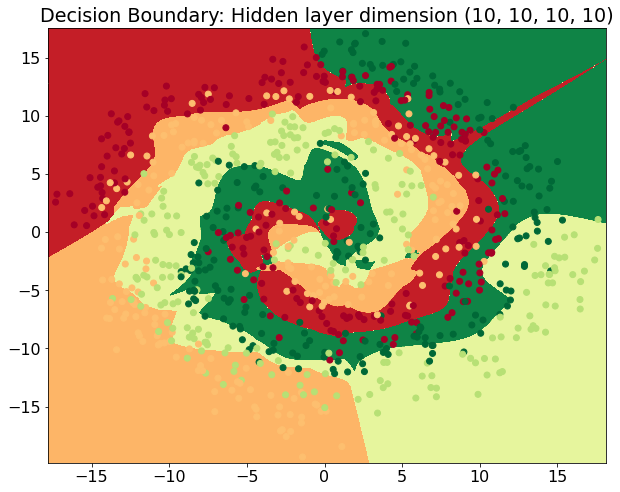

In [81]:
# Code block for result image
######### 4 hidden layers
######### 2 10 10 10-ReLU 10-ReLU 4

np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 4
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.0001 
L2_norm = 0.1
epoch = 50000

model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, X_val=X_val, y_val=y_val, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2, nn_hdim2, nn_hdim2}")

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10, 10)')

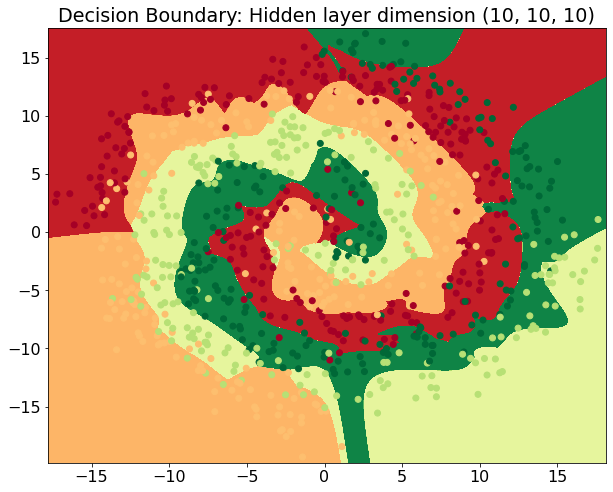

In [82]:
# Code block for result image
######### 3 hidden layers
######### 2 10 10 10-ReLU 4

np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 4
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.0001 
L2_norm = 0.1
epoch = 50000

model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, X_val=X_val, y_val=y_val, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2, nn_hdim2}")

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

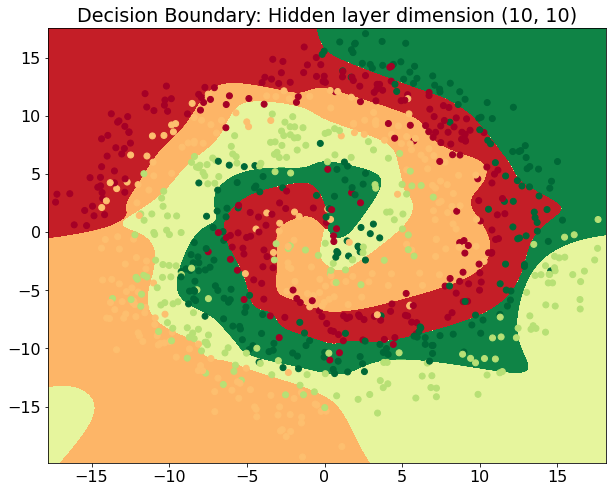

In [83]:
# Code block for result image
######### 2 hidden layers
######### 2 10 10 4

np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 4
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.0001 
L2_norm = 0.1
epoch = 50000

model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, X_val=X_val, y_val=y_val, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

위 3개의 결과를 비교했을 때, hidden layer의 수가 많아질수록 overfitting이 더 잘 일어나는 것을 확인할 수 있다.

----

### Analysis of P1 and P2 results

- training을 많이 할수록(epoch가 커질수록) loss가 작아지고 accuracy가 커지는 것을 볼 수 있다.  
- hidden layer dimension 값이 커질수록 fit이 잘 되지만 특정 값을 넘어서면 overfitting 현상이 발생한다.  
- regularization을 통해 overfitting을 막으면 더 단순하고 부드러운 경계선이 나오는걸 확인할 수 있다.